In [1]:
import os
import sys
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib as mpl

from   astropy.table import Table

In [2]:
repo_root = os.environ['HOME'] + '/DESI/'

sys.path.append(repo_root)

In [14]:
import pubplot

from   cosmo         import cosmo, fsky
from   cartesian     import rotate

In [4]:
field  = 'G9'
dryrun = False
realz  = 0

In [5]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913)])

In [6]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_N8_{}_{}.fits'.format(field, realz)
rand  = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7766460011003555)])

In [7]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

OrderedDict([('ZMIN', 0.039),
             ('ZMAX', 0.263),
             ('DZ', 0.0001),
             ('NRAND', 2531909),
             ('FIELD', 'G9'),
             ('AREA', 60.0),
             ('BOUND_PERCENT', 1.0),
             ('VOL', 2531908.950723488),
             ('RAND_DENS', 1.0),
             ('VOL8', 2144.660584850632),
             ('NRAND8', 2144.660584850632),
             ('NRAND8_PERR', 46.31048029172913),
             ('RSPHERE', 8.0),
             ('FILLFACTOR_INFRAC', 0.7766460011003555)])

In [8]:
rand

RANDOM_RA,RANDOM_DEC,Z,V,RANDID,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,IS_BOUNDARY,RAND_N8,FILLFACTOR,BOUND_DIST,BOUND_ID
float32,float32,float32,float32,int64,bytes4,float32,float32,float32,int64,int32,float64,float64,int64
129.91917,0.9630972,0.17833136,836733.75,1033339,G9,-331.0364,395.646,8.672172,0,2121,0.9889676786071583,7.254431862020988,1862828
134.6177,-0.5850006,0.24175805,2001640.9,277242,G9,-484.6323,491.143,-7.0451984,0,2191,1.021606875920926,16.51122748603918,179421
138.14908,0.5982364,0.2318685,1777287.4,2015130,G9,-493.99463,442.47278,6.924683,0,2130,0.9931641468332142,27.23674006160685,1882340
129.85628,1.6507276,0.21484718,1429525.0,167734,G9,-395.11298,473.28323,17.767584,0,2116,0.9866363073704606,7.962683501090891,1145194
137.84189,0.65900105,0.18979728,1001433.6,620978,G9,-406.0459,367.6393,6.300375,0,2155,1.0048210030167026,21.965019684610855,2299144
136.4454,-1.2915285,0.0738935,63461.688,127288,G9,-158.23444,150.44571,-4.9225125,0,1522,0.7096694044507755,2.7167478710942414,1850872
133.5719,2.983789,0.20031433,1169448.5,1147770,G9,-397.06546,417.36942,30.027184,1,1112,0.5184969630415653,0.0,0
135.72247,-0.6331526,0.1450767,459970.44,1443865,G9,-302.58542,295.04907,-4.670449,0,2147,1.0010908090379862,9.855697324566338,1805739
131.47552,1.0984006,0.14652121,473423.06,1362489,G9,-282.57245,319.66513,8.180246,0,2184,1.0183429561895492,13.941318741591584,998460


In [9]:
fpath = os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_{}.fits'.format(field, realz)

if dryrun:
    fpath = fpath.replace('.fits', '_dryrun.fits')

rand = Table.read(fpath)
rand.meta

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits'

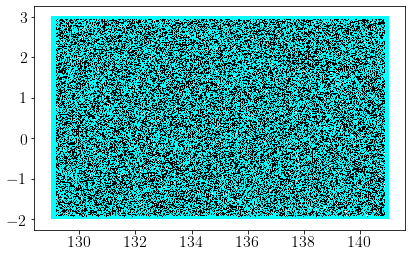

In [10]:
pl.plot(rand['RANDOM_RA'][::10], rand['RANDOM_DEC'][::10], marker=',', lw=0.0, c='k')
pl.plot(rand['RANDOM_RA'][rand['IS_BOUNDARY'].astype(bool)], rand['RANDOM_DEC'][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='cyan')

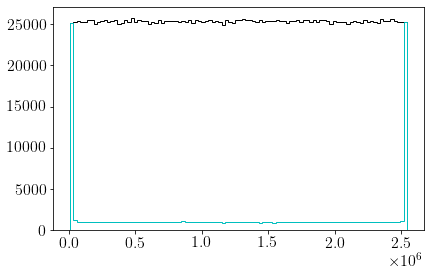

In [11]:
_ = pl.hist(rand['V'], bins=100, histtype='step', color='k')
_ = pl.hist(rand['V'][rand['IS_BOUNDARY'].astype(bool)], bins=100, histtype='step', color='c')

(0.0, 0.6)

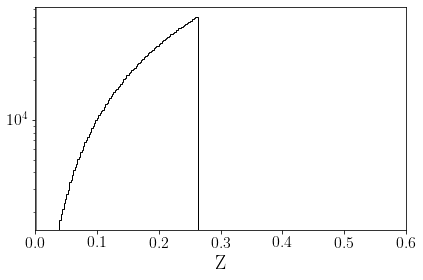

In [12]:
_ = pl.hist(rand['Z'], bins=100, histtype='step', color='k')
pl.axvline(300. / 2.9979e5, lw=0.5, c='k')
pl.yscale('log')
pl.xlabel('Z')

pl.xlim(0.0, 0.6)

In [23]:
pos = np.c_[rand['CARTESIAN_X'], rand['CARTESIAN_Y'], rand['CARTESIAN_Z']]
pos = rotate(rand['RANDOM_RA'], rand['RANDOM_DEC'], pos)

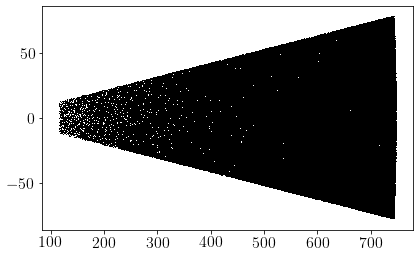

In [24]:
pl.plot(pos[::10,0], pos[::10,1], marker=',', lw=0.0, c='k')

Text(0, 0.5, 'y')

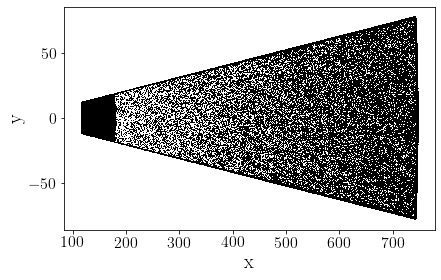

In [26]:
pl.plot(pos[:,0][rand['IS_BOUNDARY'].astype(bool)], pos[:,1][rand['IS_BOUNDARY'].astype(bool)], marker=',', lw=0.0, c='k')
pl.xlabel('x')
pl.ylabel('y')

(0.0, 1000.0)

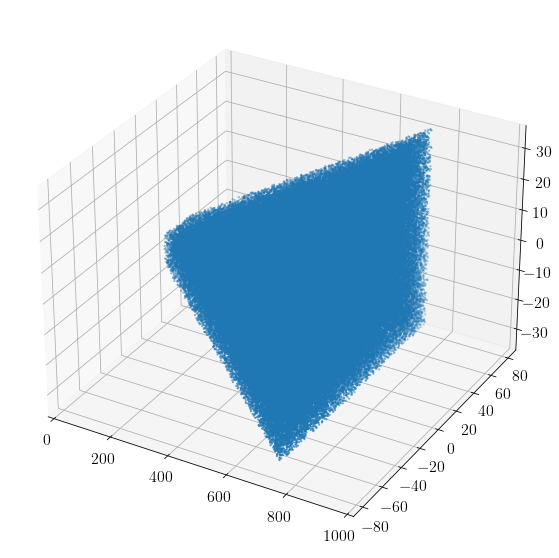

In [27]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[::10, 0],\
           pos[::10, 1],\
           pos[::10, 2],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

(0.0, 1000.0)

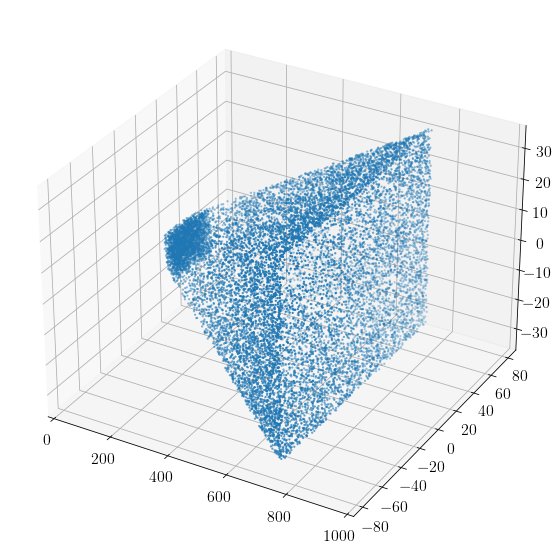

In [28]:
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.scatter(pos[:,0][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,1][rand['IS_BOUNDARY'].astype(bool)][::10],\
           pos[:,2][rand['IS_BOUNDARY'].astype(bool)][::10],\
           marker='.',\
           lw=0.0)

ax.set_xlim(0.0, 1000.)

In [29]:
np.mean(rand['V'] < np.percentile(rand['V'], 1.))

0.010000359412601321

In [30]:
np.mean(rand['IS_BOUNDARY'].data)

0.05877027965855013

In [31]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY',
 'RAND_N8',
 'FILLFACTOR',
 'BOUND_DIST',
 'BOUND_ID')

In [32]:
rand['RAND_N8'].data.min(), rand['RAND_N8'].data.max()

(290, 2341)

(50.0, 2500.0)

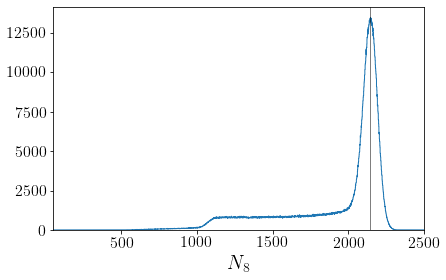

In [36]:
_ = pl.hist(rand['RAND_N8'], bins=np.arange(0, 3500, 1), histtype='step')

pl.axvline(rand.meta['NRAND8'], c='k', lw=0.5)

pl.xlabel(r'$N_8$')
pl.xlim(50., 2500.)

In [37]:
# 100. * np.sqrt(rand.meta['NRAND8']) / rand.meta['NRAND8']

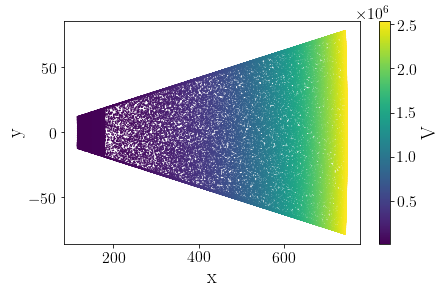

In [39]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['V'][isin], s=2)
pl.xlabel('x')
pl.ylabel('y')
pl.colorbar(label='V')

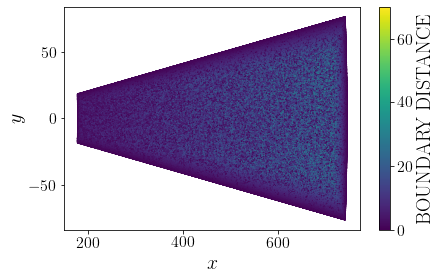

In [40]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='BOUNDARY DISTANCE')

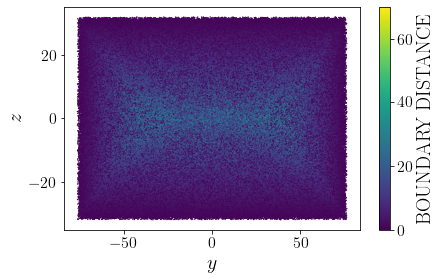

In [42]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,1][isin], pos[:,2][isin], lw=0.0, c=rand['BOUND_DIST'][isin], s=2, vmin=0., vmax=70.)
pl.xlabel('$y$')
pl.ylabel('$z$')
pl.colorbar(label='BOUNDARY DISTANCE')

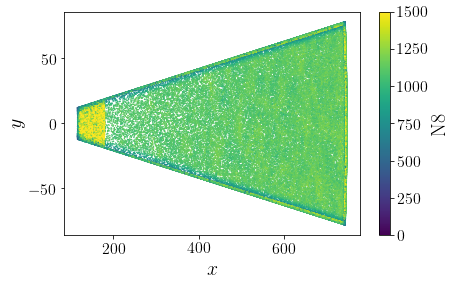

In [44]:
isin = rand['IS_BOUNDARY'].astype(bool)

pl.scatter(pos[:,0][isin], pos[:,1][isin], lw=0.0, c=rand['RAND_N8'][isin], vmin=0, vmax=1500, s=2)
pl.xlabel('$x$')
pl.ylabel('$y$')
pl.colorbar(label='N8')

(0.2, 1.2)

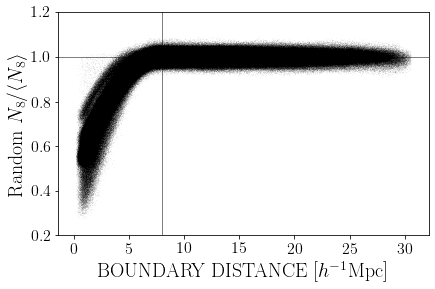

In [47]:
isin = ~rand['IS_BOUNDARY'].astype(bool)

pl.scatter(rand['BOUND_DIST'][isin], rand['RAND_N8'][isin] / rand.meta['NRAND8'], marker='.', lw=0.0, s=1, alpha=0.1, c='k')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random $N_8 / \langle N_8 \rangle$')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.2)

Text(0.5, 0, 'BOUND_DIST [Mpc/h]')

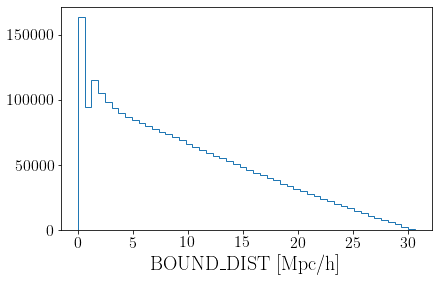

In [48]:
_ = pl.hist(rand['BOUND_DIST'], bins=50, histtype='step')
pl.xlabel('BOUND_DIST [Mpc/h]')

In [49]:
gold = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gold.meta

FileNotFoundError: [Errno 2] No such file or directory: '/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_ddp_n8.fits'

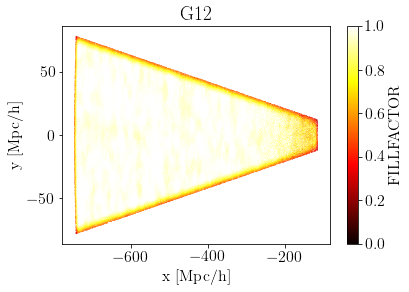

In [355]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

# TODO: Get from randoms header when available. 
ddp_zmin = gold.meta['DDP1_ZMIN']
ddp_zmax = gold.meta['DDP1_ZMAX']
        
isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
randoms_slice = randoms_slice_nolimits[isin]
    
plt.scatter(randoms_slice['CARTESIAN_X'],\
            randoms_slice['CARTESIAN_Y'],\
            c=randoms_slice['FILLFACTOR'],\
            marker='.',\
            lw=0.0,\
            s=1,\
            vmin=0.,\
            vmax=1.,\
            cmap='hot')

pl.xlabel('x [Mpc/h]')
pl.ylabel('y [Mpc/h]')

pl.colorbar(label='FILLFACTOR')
    
# pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
# pl.ylim(-80., 80.)
    
plt.title('{}'.format(field))
plt.show()

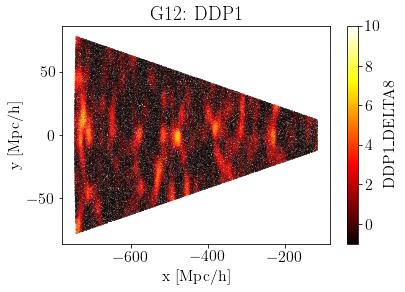

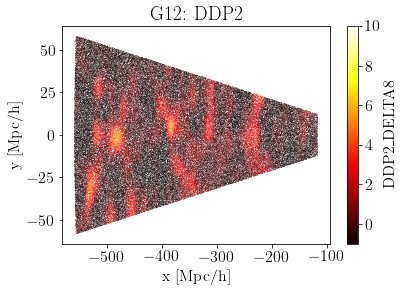

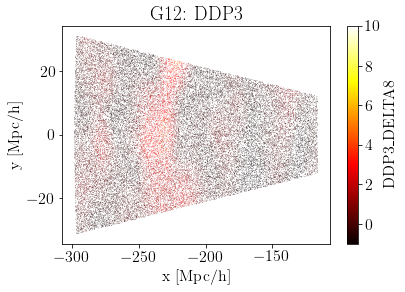

In [356]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                vmin=-1.,\
                vmax=10.,\
                cmap='hot')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label='DDP{}_DELTA8'.format(idx))
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [357]:
cmap = plt.cm.tab20c  # define the colormap

# extract all colors from the .jet map

cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)

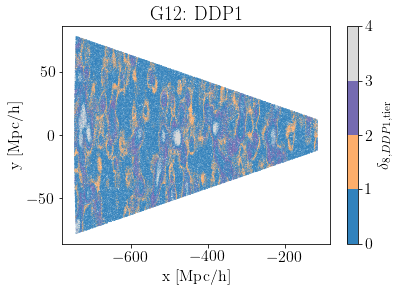

In [358]:
randoms_slice_nolimits = rand[np.abs(rand['CARTESIAN_Z']) < 5.]

labels = np.array(["d0","d1","d2","d3"])

for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label=r'$\delta_{8, DDP1, {\rm tier}}$')
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

In [359]:
from   scipy.spatial.transform import Rotation as R

rotate = True

phi        = np.radians(randoms_slice['RANDOM_RA'])
theta      = np.pi/2. - np.radians(randoms_slice['RANDOM_DEC'])

mean_phi   = np.median(phi)
mean_theta = np.median(theta)

xs = randoms_slice['CARTESIAN_X']
ys = randoms_slice['CARTESIAN_Y']
zs = randoms_slice['CARTESIAN_Z']

pos   = np.c_[xs, ys, zs]
    
if rotate:
    rot   = R.from_rotvec(-mean_phi * np.array([0, 0, 1]))

    res   = rot.apply(pos)

    rot   = R.from_rotvec((np.pi/2. - mean_theta) * np.array([0, 1, 0]))

    resres = rot.apply(res)

    pos = resres


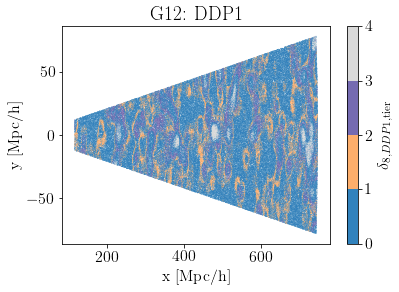

In [360]:
for idx in np.arange(1, 2, 1):
    # TODO: Get from randoms header when available. 
    ddp_zmin = gold.meta['DDP{}_ZMIN'.format(idx)]
    ddp_zmax = gold.meta['DDP{}_ZMAX'.format(idx)]
        
    isin = (randoms_slice_nolimits['Z'] > ddp_zmin) & (randoms_slice_nolimits['Z'] < ddp_zmax)
    
    randoms_slice = randoms_slice_nolimits[isin]
    
    
    # rotations testing
    rotate = True
    phi        = np.radians(randoms_slice['RANDOM_RA'])
    theta      = np.pi/2. - np.radians(randoms_slice['RANDOM_DEC'])
    mean_phi   = np.median(phi)
    mean_theta = np.median(theta)
    xs = randoms_slice['CARTESIAN_X']
    ys = randoms_slice['CARTESIAN_Y']
    zs = randoms_slice['CARTESIAN_Z']
    pos   = np.c_[xs, ys, zs]
    if rotate:
        rot   = R.from_rotvec(-mean_phi * np.array([0, 0, 1]))
        res   = rot.apply(pos)
        rot   = R.from_rotvec((np.pi/2. - mean_theta) * np.array([0, 1, 0]))
        resres = rot.apply(res)
        pos = resres

    plt.scatter(pos[:,0],\
            pos[:,1],\
            c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
            marker='.',\
            lw=0.0,\
            s=1,\
            cmap=cmap,\
            norm=norm)
        
    '''
    plt.scatter(randoms_slice['CARTESIAN_X'],\
                randoms_slice['CARTESIAN_Y'],\
                c=randoms_slice['DDP{}_DELTA8_TIER'.format(idx)],\
                marker='.',\
                lw=0.0,\
                s=1,\
                cmap=cmap,\
                norm=norm)
    '''
    
    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')

    pl.colorbar(label=r'$\delta_{8, DDP1, {\rm tier}}$')
    
    # pl.xlim(0, 1.1 * cosmo.comoving_distance(gold.meta['DDP1_ZMAX']).value)
    # pl.ylim(-80., 80.)
    
    plt.title('{}:  DDP{}'.format(field, idx))
    plt.show()

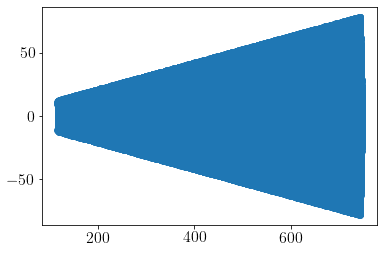

In [361]:
plt.scatter(pos[:,0], pos[:,1])

Text(0, 0.5, 'DDP2_DELTA8')

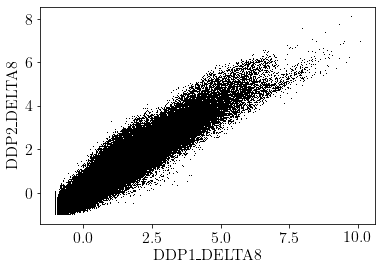

In [362]:
# Larger minimum redshift. 
ddp1_zmin = gold.meta['DDP1_ZMIN']

# Smaller maximum redshift. 
ddp3_zmax = gold.meta['DDP2_ZMAX']
            
isin = (rand['Z'] > ddp1_zmin) & (rand['Z'] < ddp3_zmax)

pl.plot(rand['DDP1_DELTA8'][isin], rand['DDP2_DELTA8'][isin], marker=',', lw=0.0, c='k')

pl.xlabel('DDP1_DELTA8')
pl.ylabel('DDP2_DELTA8')

In [364]:
rand_ddp1 = rand[rand['Z'] > rand.meta['DDP1_ZMIN']] 
rand_ddp1 = rand_ddp1[rand_ddp1['Z'] < rand.meta['DDP1_ZMAX']]

rand_ddp2 = rand[rand['Z'] > rand.meta['DDP2_ZMIN']] 
rand_ddp2 = rand_ddp2[rand_ddp2['Z'] < rand.meta['DDP2_ZMAX']]

rand_ddp3 = rand[rand['Z'] > rand.meta['DDP3_ZMIN']] 
rand_ddp3 = rand_ddp3[rand_ddp3['Z'] < rand.meta['DDP3_ZMAX']]

rand_ddp1['FILLFACTOR'] = np.clip(rand_ddp1['FILLFACTOR'], 0, 1)
rand_ddp2['FILLFACTOR'] = np.clip(rand_ddp2['FILLFACTOR'], 0, 1)
rand_ddp3['FILLFACTOR'] = np.clip(rand_ddp3['FILLFACTOR'], 0, 1)

(array([3.80000e+01, 1.49900e+03, 5.69400e+03, 1.28970e+04, 6.19550e+04,
        7.23990e+04, 7.50510e+04, 8.00020e+04, 9.59800e+04, 8.60295e+05]),
 array([0.14361247, 0.22925122, 0.31488997, 0.40052873, 0.48616748,
        0.57180623, 0.65744499, 0.74308374, 0.82872249, 0.91436125,
        1.        ]),
 <BarContainer object of 10 artists>)

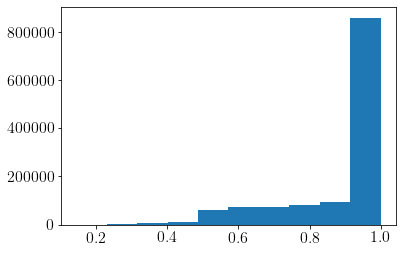

In [365]:
plt.hist(rand_ddp1['FILLFACTOR'])

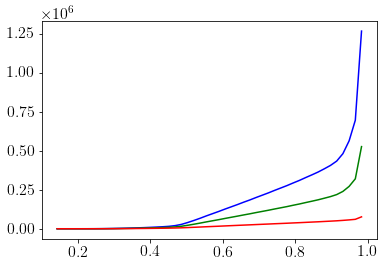

In [366]:
import numpy as np
import matplotlib.pyplot as plt

values, base = np.histogram(rand_ddp1['FILLFACTOR'], bins=50)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')

values, base = np.histogram(rand_ddp2['FILLFACTOR'], bins=50)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='green')

values, base = np.histogram(rand_ddp3['FILLFACTOR'], bins=50)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='red')

In [371]:
x = np.arange(0, 1.0005, 0.005)

y1 = []
y2 = []
y3 = []
for i in range(len(x)):
    frac1 = len(rand_ddp1[rand_ddp1['FILLFACTOR'] > x[i]]) / len(rand_ddp1)
    frac2 = len(rand_ddp2[rand_ddp2['FILLFACTOR'] > x[i]]) / len(rand_ddp2)
    frac3 = len(rand_ddp3[rand_ddp3['FILLFACTOR'] > x[i]]) / len(rand_ddp3)

    y1.append(frac1)
    y2.append(frac2)
    y3.append(frac3)

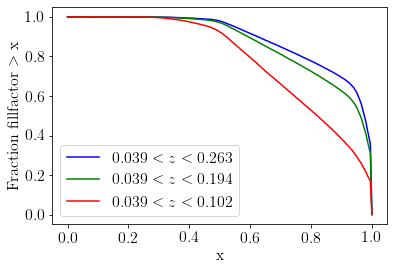

In [372]:
plt.plot(x, y1, color='blue', label=r'${:.3f}<z<{:.3f}$'.format(rand.meta['DDP1_ZMIN'], rand.meta['DDP1_ZMAX']))
plt.plot(x, y2, color='green', label=r'${:.3f}<z<{:.3f}$'.format(rand.meta['DDP2_ZMIN'], rand.meta['DDP2_ZMAX']))
plt.plot(x, y3, color='red', label=r'${:.3f}<z<{:.3f}$'.format(rand.meta['DDP3_ZMIN'], rand.meta['DDP3_ZMAX']))
plt.xlabel('x')
plt.ylabel(r'Fraction fillfactor $>$ x')
plt.legend()

Text(0.5, 0, 'rand_fillfactor')

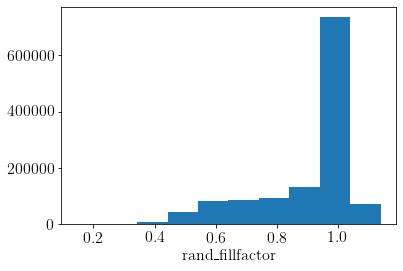

In [369]:
plt.hist(rand['FILLFACTOR'])
plt.xlabel('rand_fillfactor')

# Done.